<a href="https://colab.research.google.com/github/Saniru2006/Telco_Customer_Churn_2425606/blob/main/CM2604_2425606_ICW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Packages

In [1]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.5 MB/s eta 0:00:00


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from scipy import stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


# TASK 1: Exploratory Data Analysis

In [3]:
print("\nTASK 1: EXPLORATORY DATA ANALYSIS")

#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
print("\nLoading dataset...")
file_path = '/content/drive/MyDrive/Colab Notebooks/CM2604_ML_ICW_Test/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Display basic information
print("\nDataset preview:")
display(df.head())
print(f"\nDataset info:")
df.info()


TASK 1: EXPLORATORY DATA ANALYSIS
Mounted at /content/drive

Loading dataset...
Dataset loaded: 7043 rows, 21 columns

Dataset preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

## Data Quality Check

In [4]:
print("\n1.1 DATA QUALITY CHECK")

# Check for missing values
print("\nMissing values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check constant columns
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
if constant_cols:
    print(f"\nConstant columns: {constant_cols}")
else:
    print("\nNo constant columns found")


1.1 DATA QUALITY CHECK

Missing values:
Series([], dtype: int64)

Duplicate rows: 0

Data types:
object     18
int64       2
float64     1
Name: count, dtype: int64

No constant columns found


## Data Cleaning

In [5]:
print("\n1.2 DATA CLEANING")

df_clean = df.copy()

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
missing_after = df_clean['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges after conversion: {missing_after}")

# Fill missing TotalCharges with 0
df_clean['TotalCharges'].fillna(0, inplace=True)
print("Missing values filled with 0")

# Remove customerID for privacy
df_clean = df_clean.drop('customerID', axis=1)
print("customerID column removed")

print(f"\nCleaned dataset shape: {df_clean.shape}")


1.2 DATA CLEANING
Missing values in TotalCharges after conversion: 11
Missing values filled with 0
customerID column removed

Cleaned dataset shape: (7043, 20)


## Target Variable Analysis


1.3 TARGET VARIABLE ANALYSIS (CHURN)
Churn Distribution:
 No Churn:  5,174 (73.5%)
 Churn:  1,869 (26.5%)
 Baseline Accuracy: 73.5%


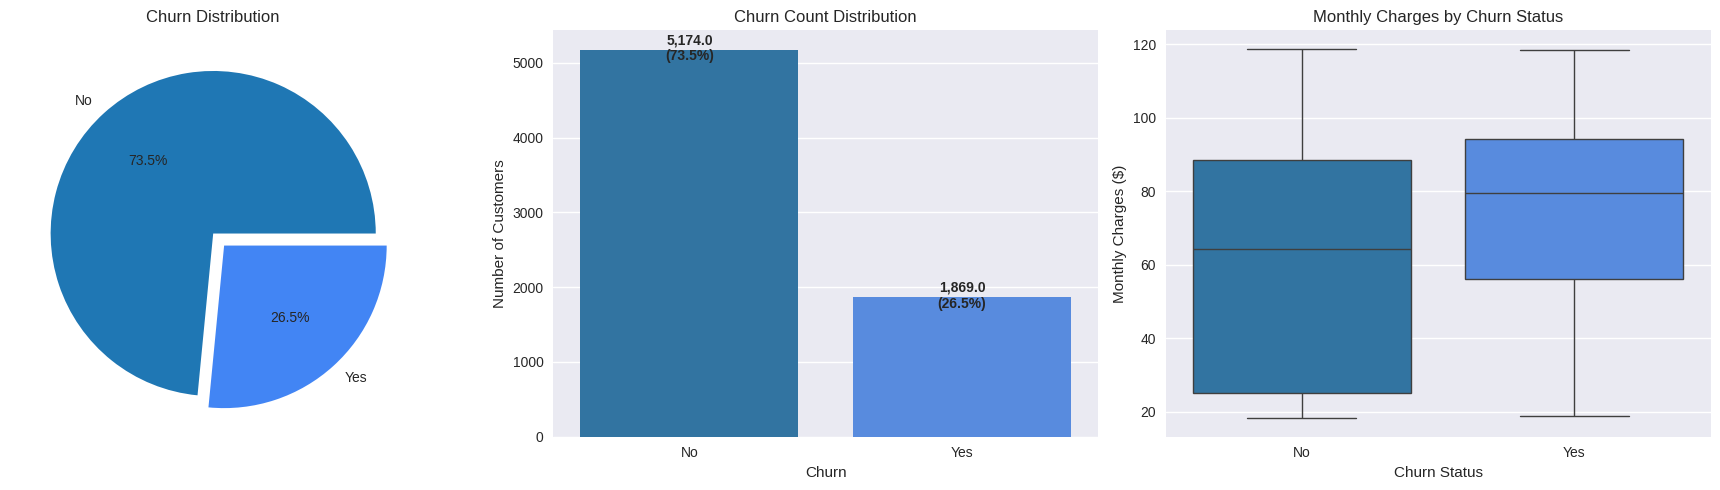

In [6]:
print("\n1.3 TARGET VARIABLE ANALYSIS (CHURN)")

churn_counts = df_clean['Churn'].value_counts()
churn_percentage = df_clean['Churn'].value_counts(normalize=True) * 100

print(f"Churn Distribution:")
print(f" No Churn: {churn_counts['No']:>6,} ({churn_percentage['No']:.1f}%)")
print(f" Churn: {churn_counts['Yes']:>6,} ({churn_percentage['Yes']:.1f}%)")
print(f" Baseline Accuracy: {churn_percentage['No']:.1f}%")

# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart
axes[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#1f77b4','#4285f4'], explode=[0, 0.1])
axes[0].set_title('Churn Distribution')

# Bar chart
sns.countplot(data=df_clean, x='Churn', ax=axes[1], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
axes[1].set_title('Churn Count Distribution')
axes[1].set_ylabel('Number of Customers')
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width()/2., p.get_height() + 20,
                f'{p.get_height():,}\n({p.get_height()/len(df_clean)*100:.1f}%)',
                ha='center', va='center', fontweight='bold')

# Monthly Charges by Churn Status (Box plot)
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', ax=axes[2], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
axes[2].set_title('Monthly Charges by Churn Status')
axes[2].set_xlabel('Churn Status')
axes[2].set_ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

## Outlier Detection


1.4 OUTLIER DETECTION
Outliers Analysis (IQR Method):
  tenure: 0 outliers (0.00%)
  MonthlyCharges: 0 outliers (0.00%)
  TotalCharges: 0 outliers (0.00%)


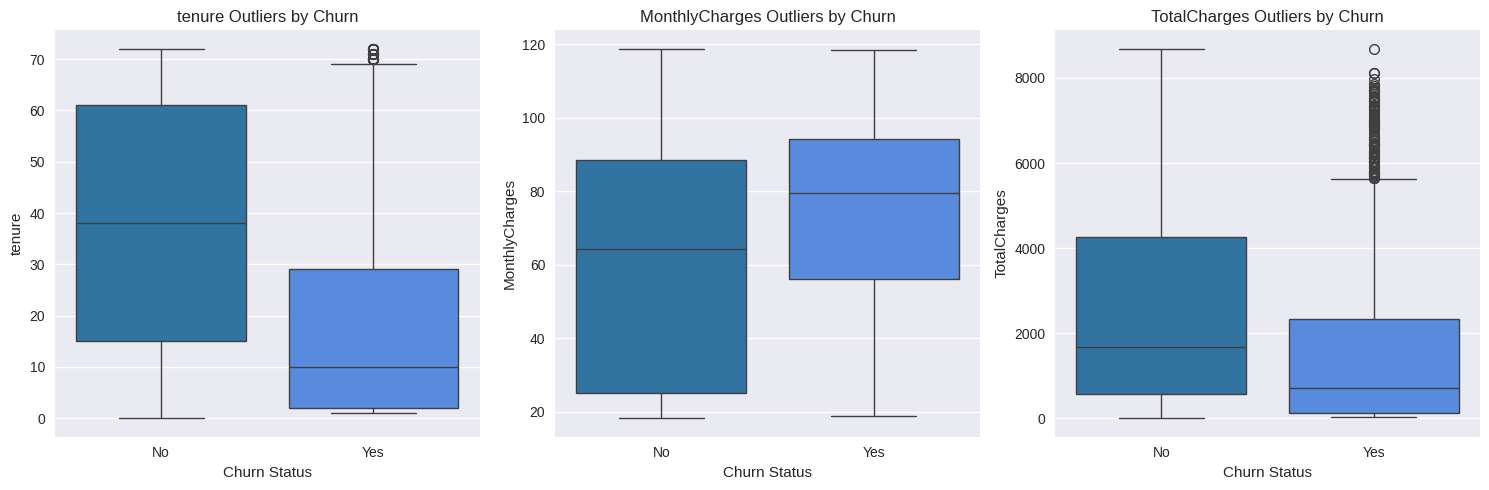

In [7]:
print("\n1.4 OUTLIER DETECTION")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("Outliers Analysis (IQR Method):")

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")

# Box plots for outlier visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_clean, x='Churn', y=col, ax=axes[i], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
    axes[i].set_title(f'{col} Outliers by Churn')
    axes[i].set_xlabel('Churn Status')
plt.tight_layout()
plt.show()

## Numerical Variable Analysis

## Categorical Variable Analysis

## Correlation Analysis

# TASK 2: Model Development

## Data Preparation

## Model 1: Decision Tree

## Model 2: Neural Network

## Model Evaluation

## Model Comparison

##